In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("emotions_50.csv")
df.head()

,Unnamed: 0,text,label
0,305154,i feel pleasant staying away from the former,1
1,53638,i just feel helpless right now though,0
2,53323,i am happy to be here on our farm and i feel o...,1
3,144955,i feel like its rude to draft someone into a h...,3
4,241468,i feel that it did not quite linger on that fe...,4


In [3]:
X = df.text
y = df.label
print(X.head())
print(y.head())

0         i feel pleasant staying away from the former
1                i just feel helpless right now though
2    i am happy to be here on our farm and i feel o...
3    i feel like its rude to draft someone into a h...
4    i feel that it did not quite linger on that fe...
Name: text, dtype: object
0    1
1    0
2    1
3    3
4    4
Name: label, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   text        50000 non-null  object
 2   label       50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(45000,)
(5000,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  263900


In [7]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(45000, 263900)
(5000, 263900)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[1197  156   11   51   41    2]
 [ 266 1272   37   38   21    5]
 [ 112  167  154    8    8    0]
 [ 166  103    9  394   26    2]
 [ 132   91    5   33  305    5]
 [  46   44    1    9   23   60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1458
           1       0.69      0.78      0.73      1639
           2       0.71      0.34      0.46       449
           3       0.74      0.56      0.64       700
           4       0.72      0.53      0.61       571
           5       0.81      0.33      0.47       183

    accuracy                           0.68      5000
   macro avg       0.72      0.56      0.60      5000
weighted avg       0.69      0.68      0.67      5000

Accuracy: 0.6764


Accuracy Score        :  0.6764
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.82      0.71      1458
           1       0.69      0.78      0.73      1639
           2       0.71      0.34      0.46       449
           3       0.74      0.56      0.64       700
           4       0.72      0.53      0.61       571
           5       0.81      0.33      0.47       183

    accuracy                           0.68      5000
   macro avg       0.72      0.56      0.60      5000
weighted avg       0.69      0.68      0.67      5000



<Axes: >

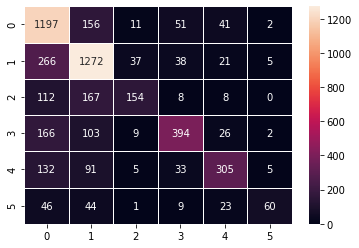

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter tunning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # weighting schemes
    'metric': ['euclidean', 'manhattan']  # distance metrics
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7044
